In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

merged = pd.read_csv("/content/merged_trades_sentiment.csv")


In [8]:
merged["Closed PnL"] = pd.to_numeric(merged["Closed PnL"], errors="coerce")
merged["Size USD"] = pd.to_numeric(merged["Size USD"], errors="coerce")
merged["Execution Price"] = pd.to_numeric(merged["Execution Price"], errors="coerce")


In [9]:
summary = merged.groupby("sentiment").agg({
    "Closed PnL": ["mean", "median", "sum"],
    "Size USD": ["mean", "sum"],
}).round(2)

summary


Closed PnL                     Size USD              
                    mean median         sum      mean           sum
sentiment                                                          
Extreme Fear      306.50   0.00   253170.37   7479.82  6.178330e+06
Extreme Greed      62.81   0.00   105513.43   8116.03  1.363493e+07
Fear              191.49   0.00  1638798.50  30018.09  2.568948e+08
Greed             142.28   0.00   774155.81  25796.68  1.403598e+08
Neutral           176.39   0.81   562162.90  25244.36  8.045377e+07

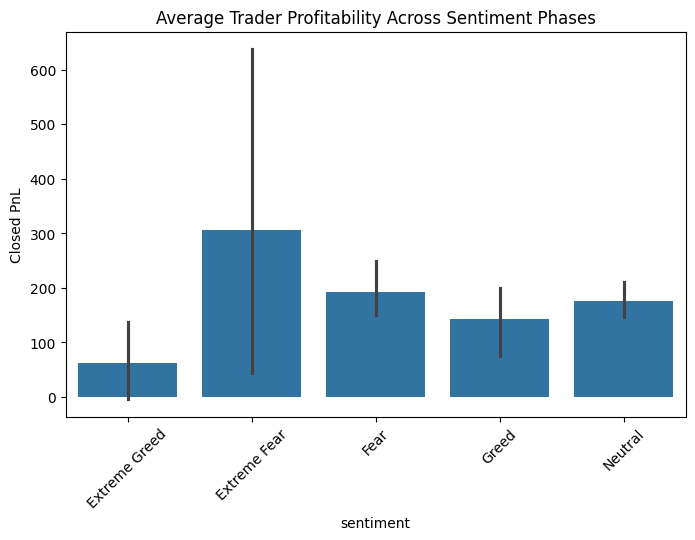

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged, x="sentiment", y="Closed PnL", estimator=np.mean)
plt.title("Average Trader Profitability Across Sentiment Phases")
plt.xticks(rotation=45)
plt.show()


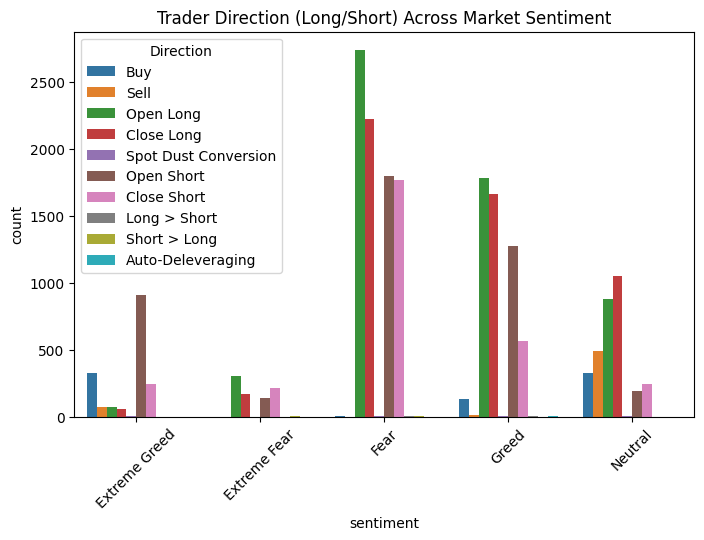

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged, x="sentiment", hue="Direction")
plt.title("Trader Direction (Long/Short) Across Market Sentiment")
plt.xticks(rotation=45)
plt.show()


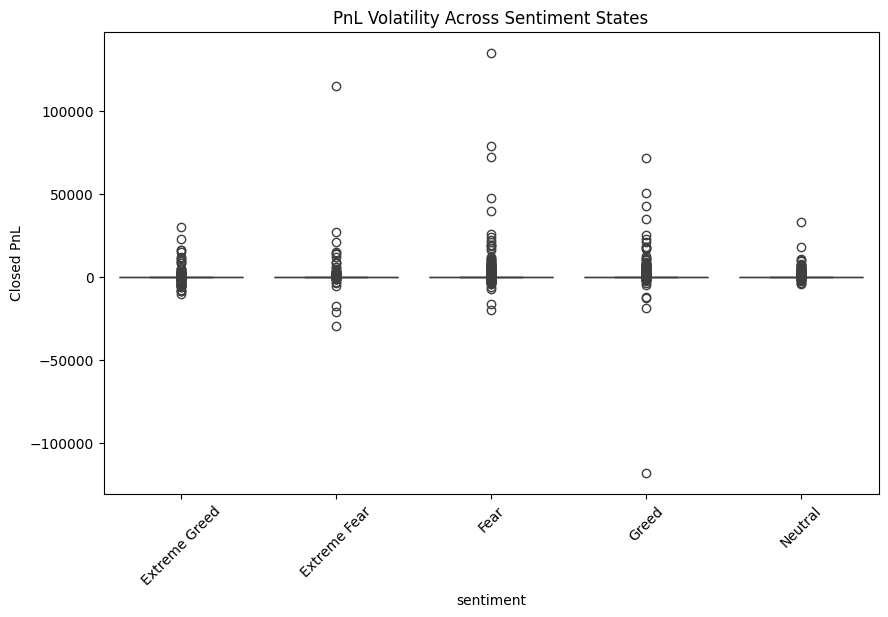

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x="sentiment", y="Closed PnL")
plt.title("PnL Volatility Across Sentiment States")
plt.xticks(rotation=45)
plt.show()


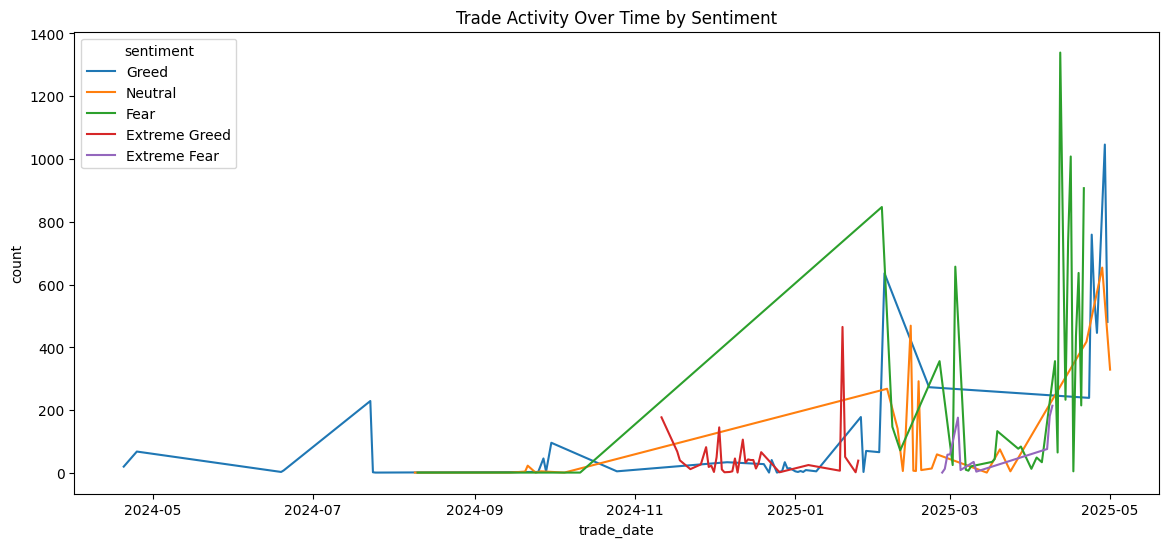

In [13]:
merged["trade_date"] = pd.to_datetime(merged["trade_date"])

volume_by_day = merged.groupby(["trade_date", "sentiment"]).size().reset_index(name="count")

plt.figure(figsize=(14,6))
sns.lineplot(data=volume_by_day, x="trade_date", y="count", hue="sentiment")
plt.title("Trade Activity Over Time by Sentiment")
plt.show()


In [14]:
merged["risk_score"] = (
    merged["Size USD"].rank(pct=True) *
    merged["Closed PnL"].apply(lambda x: 1 if x < 0 else 0)
)


In [15]:
merged.groupby("sentiment")["risk_score"].mean()


,risk_score
sentiment,
Extreme Fear,0.054092
Extreme Greed,0.063178
Fear,0.035386
Greed,0.018591
Neutral,0.008544


In [16]:
print("Key Insights:")
print("----------------------------")

print("1. Profitability Trend:")
print(summary["Closed PnL"]["mean"])

print("\n2. Trading Volume Trend:")
print(summary["Size USD"]["sum"])

print("\n3. Traders take more risks when sentiment =",
      merged.groupby("sentiment")["risk_score"].mean().idxmax())


Key Insights:
----------------------------
1. Profitability Trend:
sentiment
Extreme Fear     306.50
Extreme Greed     62.81
Fear             191.49
Greed            142.28
Neutral          176.39
Name: mean, dtype: float64

2. Trading Volume Trend:
sentiment
Extreme Fear     6.178330e+06
Extreme Greed    1.363493e+07
Fear             2.568948e+08
Greed            1.403598e+08
Neutral          8.045377e+07
Name: sum, dtype: float64

3. Traders take more risks when sentiment = Extreme Greed
